<a href="https://colab.research.google.com/github/OH1107/statistics/blob/master/training/chapter07/7%EC%9E%A5_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7장. 상관관계 분석
- 두 개 이상 변수들간의 상호 연관성을 판단하기 위한 상관관계 분석 기법의 종류에 대해 학습

## 7.1 수치형 변수의 상관관계 분석 : 피어슨 상관관계 분석



### 개념 및 주요 이론
- 수치형 변수로 이루어진 두 변수간의 선형적 연관성을 계량적으로 파악하기 위한 통계 기법
- 두 변수간의 선형적 관계의 강도를 상관계수 (𝑟)로 표현

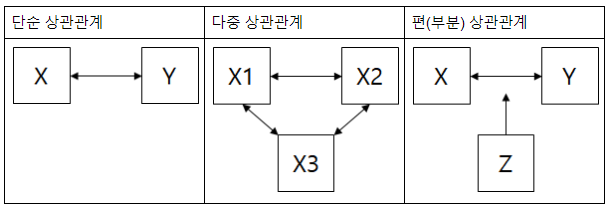

#### 공분산과 상관계수
  - 수치형 변수간 상관관계를 나타내는 지표는 공분산(covariance)과 상관계수(correlation coefficient)
  
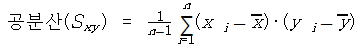

  - 그러나 공분산 값은 두 변수의 측정 단위에 의존적, 때문에 상관관계의 바향성만 알 수 있음
  - 상관계수 (𝑟)는 이러한 공분산의 단점을 보완할 수 있음

  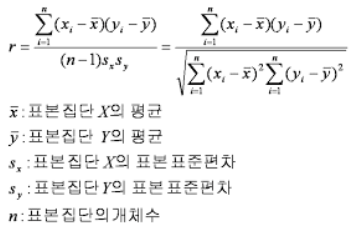
  - 피어슨 상관계수는 ‘공분산을 각 변수의 표준편차 곱으로 나눠준 값’
  - 그렇기 때문에 측정 단위와는 무관하게 -1에서 1까지 일정한 범위의 값을 가짐


### 분석 및 해석

- A 쇼핑 매출액과 높은 연관성을 지닌 고객 행태 변수가 무엇인지 파악하고자 함
- 이를 위해 방문 빈도와 구매 카테고리 수라는 변수를 선별  


- 귀무가설 = 총 매출액과 방문빈도, 구매 카테고리 수 간의 선형적인 관계가 존재하지 않는다.
- 대립가설 = 총 매출액과 방문빈도, 구매 카테고리 수 간의 선형적인 관계가 존재한다.

#### 수치형 변수의 상관관계 분석 과정

In [11]:
# 모듈 및 데이터 탑재
import pandas as pd
from scipy import stats
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/statistics/data/Ashopping.csv', sep=',', encoding='cp949')
df1 = df[['총_매출액','방문빈도','구매_카테고리_수']]

In [12]:
# 피어슨 상관계수 출력
print(stats.pearsonr(df1.총_매출액, df1.방문빈도))
print(stats.pearsonr(df1.총_매출액, df1.구매_카테고리_수))
print(stats.pearsonr(df1.방문빈도, df1.구매_카테고리_수))

(0.6311706453193392, 3.0519604496887203e-112)
(0.3083469132396713, 1.8121422756812584e-23)
(0.3958607221846449, 7.345432750388936e-39)


- 상관계수분석을 실시할 두 개의 데이터 객체를 지정
  ```python
  pearsonr(data1, data2)
  ```
- 코드 실행 결과 두 변수간의 **상관계수**와 **유의확률(p-value)**가 쌍으로 출력

#### 상관관계 테이블 출력

In [13]:
df1.corr(method='pearson')

,총_매출액,방문빈도,구매_카테고리_수
총_매출액,1.000000,0.631171,0.308347
방문빈도,0.631171,1.000000,0.395861
구매_카테고리_수,0.308347,0.395861,1.000000


- `pearsonr()` 함수 대신 `corr()` 함수를 사용하여 df1의 모든 변수간 상관계수를 출력
- `method=`인자에 수치형 변수일때는 `pearson`, 순서형 변수일때는 `spearman`을 지정

## 7.2 편(부분) 상관관계 분석

### 개념 및 주요 이론
- 일반적인 다중 상관관계 분석을 통한 변수간의 상관계수는 특정 두 변수간의 순수한 상관관계를 나타낸다고 볼 수 없음
- 제3의 변수가 두 변수의 연관성 자체에 영향을 줄 수 있기 때문
- 두 변수간의 순수한 상관관계를 파악하기 위해서는 **편(부분) 상관관계 분석**이라는 기법을 사용

#### 편(부분) 상관계수
- 특정 두 변수의 순수한 상고나관계를 확인하고자 할 때 사용
- 두 가지 변수에 영향을 미칠 수 있는 제3의 변수를 통제하거나 효과를 제거한 후, 특정 두 변수의 순수한 상관관계를 파악하기 위한 기법

- x, y사이의 z변수의 편 상관계수를 구하고자 할 때,
  - x를 종속변수, z를 독립변수로 하는 단순회귀분석에서의 잔차를 구하고
  - y를 종속변수, z를 독립변수로하는 단순회귀분석에서의 잔차를 구한 후
  - 이 두 잔차들간의 상관계수를 구하면 두 변수 x,y사이의 편 상관계수

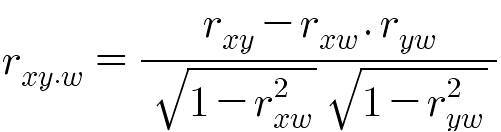

### 분석 및 해석
- 앞선 분석을 통해 '총 매출액'과 '방문빈도'는 매우 높은 상관관계가 있다는 것을 알았음
- 그러나 '총 매출액'과 '방문빈도'간의 상관관계는 '구매 카테고리 수'에 의해 영향을 받을 수 있다는 가정을 할 수 있음
- 그렇기에 다음과 같은 가설을 수립  


- 귀무가설 = 구매카테고리 수가 통제된 상황에서 총 매출액과 방문빈도 간에는 유의한 선형 관계를 갖지 않는다.
- 연구가설 = 구매카테고리 수가 통제된 상황에서 총 매출액과 방문빈도 간에는 유의한 선형 관계를 갖는다.

In [14]:
!pip install pingouin

In [15]:
from pingouin import partial_corr

partial_corr(data=df1, x='총_매출액', y='방문빈도', covar='구매_카테고리_수')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,0.582794,"[0.54, 0.62]",0.339649,0.338324,5.054646e-92,2.242e+88,1.0


- n : 데이터 개수 1000개
- r : 상관계수 0.583
- CI95% : 신뢰구간으로 0.54<x<0.62
- r2 : R-squared로 0.34
- adj_r2 : 조정된 R-squared로 0.38
- p-val : p-value로 0.001이하로 출력

- '총 매출액'과 '방문빈도'간의 상관관계는 여전히 유의
  - 그러나 '구매카테고리 수'를 통제하지 않은 상태에서의 두 변수 상관관계인 0.631보다는 약해졌다고 볼 수 있음   

- 따라서 '방문빈도'가 고객들의 '총 매출액'에 많은 영향을 주는 변수임에는 분명
- 고객들의 구매 다양성을 나타내는 '구매 카테고리 수'를 전혀 고려하지 않는다면 '방문빈도'와 '매출액'간의 관계는 약화

## 7.3 순서형 변수의 상관관계 분석


### 개념 및 주요 이론
- 서열척도로 이루어진 변수들간의 상관관계를 검정하기위한 분석기법

#### 스피어만 서열 상관게수
- 순서형 변수의 상관관계 분석은 주로 스피어만 서열 상관관계 분석을 사용
- 서열척도로 측정된 두 변수간의 상관관계를 검정하는 분석방법
- 원래 자료의 값 대신에 자료 값들의 순위(rank)를 이용하여 상관관계를 도출

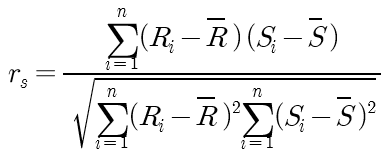
- x값들의 순위가 R, y값들의 순위가 S이다.
- 스피어만 상관계수 또한 -1에서 1 사이의 값을 갖는다.

### 분석 및 해석
- A 쇼핑은 고객들의 객단가가 높은 고객 100명과 방문빈도가 높은 고객 100명을 선별하여 이벤트를 기획하고자 함
- 두 가지 변수로 순위를 선정할 때, 선별된 고객들이 동질적이라면 구태여 두 가지 기준으로 추출하지 않아도 된다.  

- 귀무가설 = A 쇼핑 고객들의 1회 평균 매출액 순위와 방문빈도 순위는 연관성이 없다.
- 연구가설 = A 쇼핑 고객들의 1회 평균 매출액 순위와 방문빈도 순위는 연관성이 있다.

In [16]:
df1=df[['1회_평균매출액','방문빈도']]
stats.spearmanr(df1['1회_평균매출액'],df1['방문빈도'])

SpearmanrResult(correlation=-0.4988411248473936, pvalue=4.929293870381245e-64)

- 상관계수가 -0.498이 나왔다. 즉, 상관관계 방향이 음의 방향이다.
- 방문빈도가 높은 고객이 오히려 1회 평균 구매액 수준에서는 더 떨어지는 것을 알 수 있다.
- 즉 두 가지 기준을 모두 적용하여 고객들을 추출하여 이벤트를 기획해야 할 것이다.

## 7.4 정준상관분석


### 개념 및 주요 이론

- 정준상관분석(Canonical Correlation Analysis. CCA)은 변수 그룹 간의 선형 상관 관계를 탐색하는 분석 방법이다.

#### 정준 상관 모형
- p,q개로 이루어진 두 변수 그룹 X와 Y가 있다고 할 때. X와 Y를 소속된 개별 변수들간의 선행 결합으로 이루어진 **정준변수**라 한다.
- 정준변수 X와 Y 사이의 상관계수를 **정준상관계수**라고 한다.
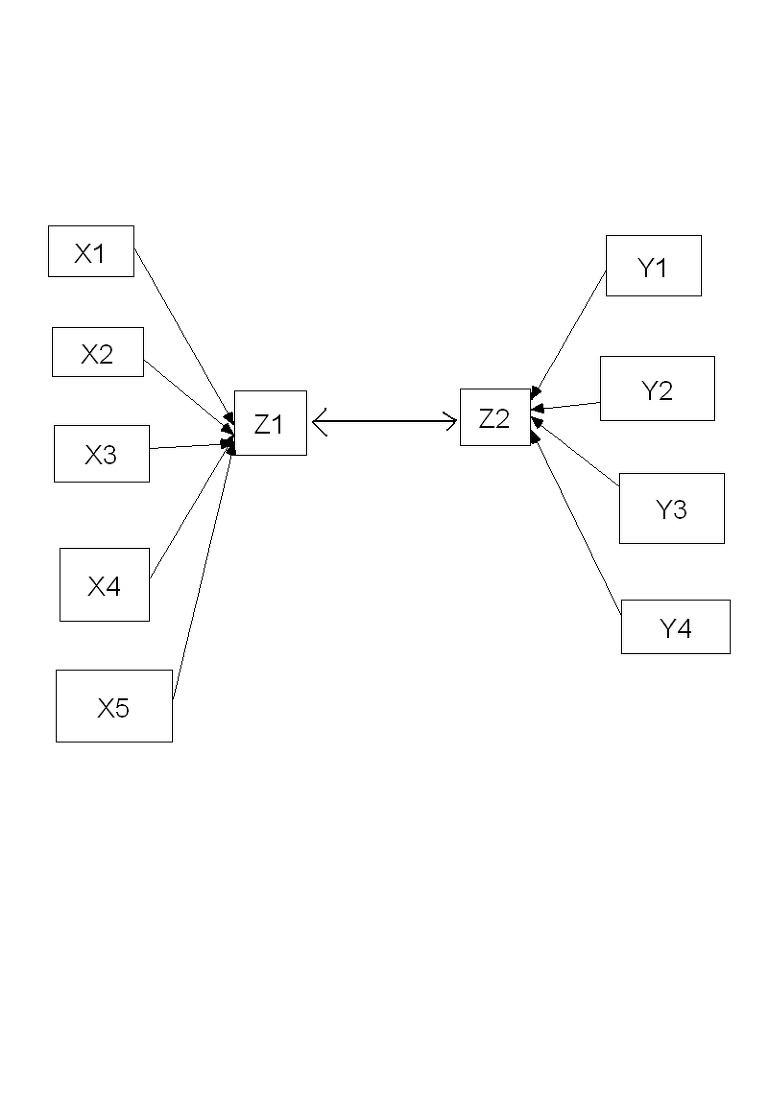

- 모든 선형결합 중 두 변수 X, Y간 상관계수를 최대화 시키는 선형 결합 X, Y를 찾는다.
- 이 때, 선형결합을 나타내는 개별 변수들의 계수는 **정준계수**라고 한다.
- 정준변수간 상관계수가 최대일 때 **제1정준상관계수**, 해당 정준변수는 **제1정준변수**라고 한다.

- 정준상관분석의 목적은 **정준적재량**(canonical loadings)과 **교차적재량**(cross loadings)을 통해 두 변수 그룹간의 관계에 대한 각 변수의 상대적 영향력을 확인하는 것도 있다.
  - 정준적재량 : 정준변수와 해당 정준변수를 구성하는 측정변수들 사이의 상관계수
  - 교차적재량 : 정준변수와 대립하는 정준변수의 측정변수들 사이의 상관계수

### 분석 및 해석

- A 쇼핑 제품 만족도와 매장 만족도 사이에 연관이 있는지 알아보고 이를 마케팅 기획에 참고하고자 한다,
  - 제품 만족도 : 가격, 디자인, 품질만족도
  - 매장 만족도 : 직원 서비스, 매장 시설, 고객관리
- 위 데이터를 바탕으로 정준상관분석을 실시한다. 가설은 다음과 같다.  

- 귀무가설 = 제품 만족도는 매장 만족도와 연관성이 없다.
- 연구가설 = 제품 만족도는 매장 만족도와 유의한 상관관계를 가지고 있다.

In [25]:
# 모듈 및 데이터 탑재
import numpy as np
from sklearn.cross_decomposition import CCA
from scipy import stats

df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/statistics/data/CCA.csv', sep=',',encoding='cp949')
U = df[['품질','가격','디자인']]
V = df[['직원 서비스','매장 시설','고객관리']]
df.head()

,품질,가격,디자인,직원 서비스,매장 시설,고객관리
0,8,10,71,72,9,27
1,83,21,94,63,7,77
2,81,62,74,96,7,32
3,75,74,98,96,3,55
4,34,76,98,84,6,95


In [18]:
# 정준변수 구하기
cca = CCA(n_components=1).fit(U,V)
U_c, V_c = cca.transform(U, V)
U_c1=pd.DataFrame(U_c)[0]
V_c1=pd.DataFrame(V_c)[0]
print(U_c)
print(V_c)

[[-0.55451512]
 [-0.12301628]
 [ 0.40708859]
 [ 1.4861872 ]
 [ 1.8393597 ]
 [-0.18638005]
 [-0.47604906]
 [-1.10459412]
 [-0.72231536]
 [ 0.02423555]
 [-0.69744765]
 [ 0.54958654]
 [-0.8098459 ]
 [ 0.36770595]]
[[-0.29828858]
 [ 0.51338449]
 [ 0.95000731]
 [ 1.76514223]
 [ 1.81062484]
 [-0.74632557]
 [-1.67676657]
 [-1.00578133]
 [-1.40361614]
 [ 1.38766197]
 [-1.28827534]
 [-0.3120564 ]
 [ 0.23113188]
 [ 0.07315722]]


In [19]:
# 정준상관계수 구하기
CC1 =stats.pearsonr(U_c1,V_c1)
print('제1정준상관계수 : ', CC1)

제1정준상관계수 :  (0.7717687943183485, 0.00122266701923902)


In [22]:
# 정준적재량, 교차적재량 구하기
print('제품 만족도 정준변수와 해당 변수들간 정준적재량 : ',np.corrcoef(U_c1.T, U.T)[0,1:4])
print('제품 만족도 정준변수와 매장 만족도 변수들간 교차적재량 : ',np.corrcoef(U_c1.T, V.T)[0,1:])
print('매장 만족도 정준변수와 해당 변수들간 정준적재량 : ',np.corrcoef(V_c1.T, V.T)[0,1:])
print('매장 만족도 정준변수와 제품 만족도 변수들간 교차적재량 : ',np.corrcoef(V_c1.T, U.T)[0,1:4])

제품 만족도 정준변수와 해당 변수들간 정준적재량 :  [0.35045604 0.77461847 0.55191153]
제품 만족도 정준변수와 매장 만족도 변수들간 교차적재량 :  [ 0.70598452 -0.0438384   0.5889048 ]
매장 만족도 정준변수와 해당 변수들간 정준적재량 :  [ 0.91476168 -0.0568025   0.76305858]
매장 만족도 정준변수와 제품 만족도 변수들간 교차적재량 :  [0.27044132 0.5978383  0.42592516]


- `cca.transform()`함수를 사용해서 정준변수를 산출
  - `transform(data1, data2)`으로 인자에 구하고자 하는 변수그룹 객체를 입력
- 14개의 정준변수 값(정준변량)이 생성